            timestamp  temperature(C)  pressure(bar)  flow_rate(L/h)  \
0 2024-01-01 00:00:00      154.419466       5.417516      106.774187   
1 2024-01-01 01:00:00      150.979325       4.999337       95.705019   
2 2024-01-01 02:00:00      151.787683       4.202062       97.165966   
3 2024-01-01 03:00:00      138.283690       5.443577      103.575647   
4 2024-01-01 04:00:00      144.575837       4.490246      105.233345   

   reactor conversion(%)  
0              86.874690  
1              85.232408  
2              85.230724  
3              88.232179  
4              92.717120  


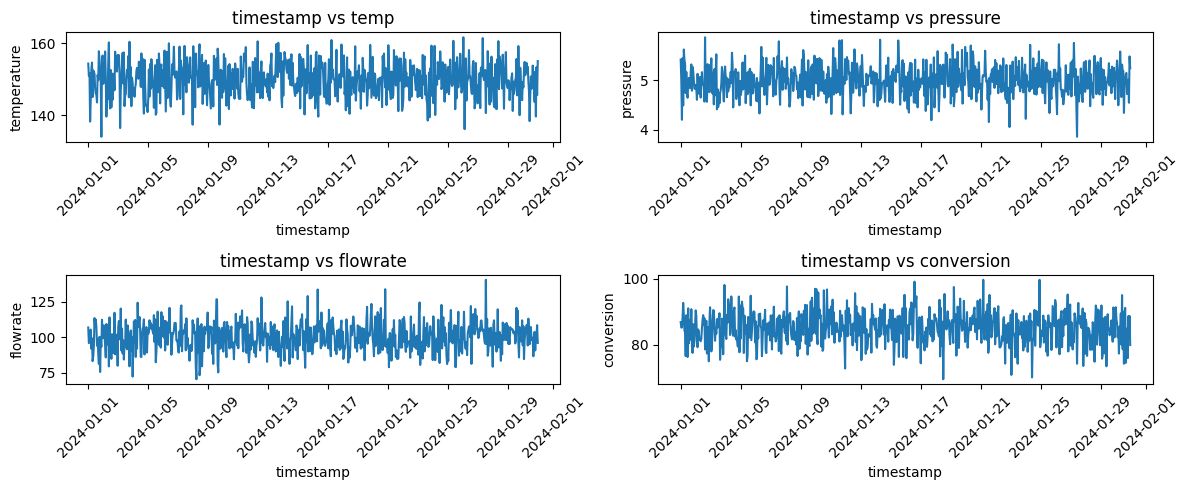

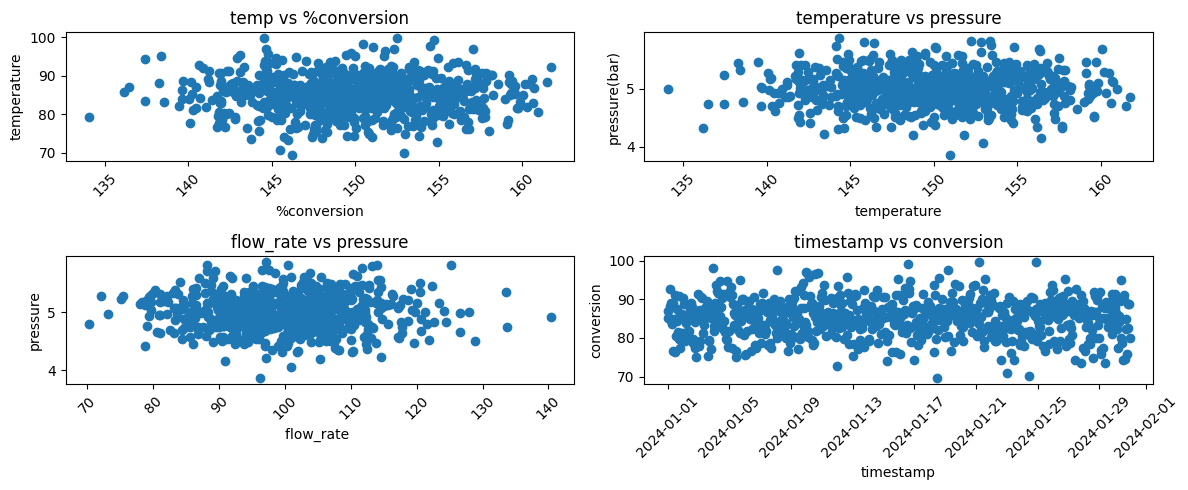

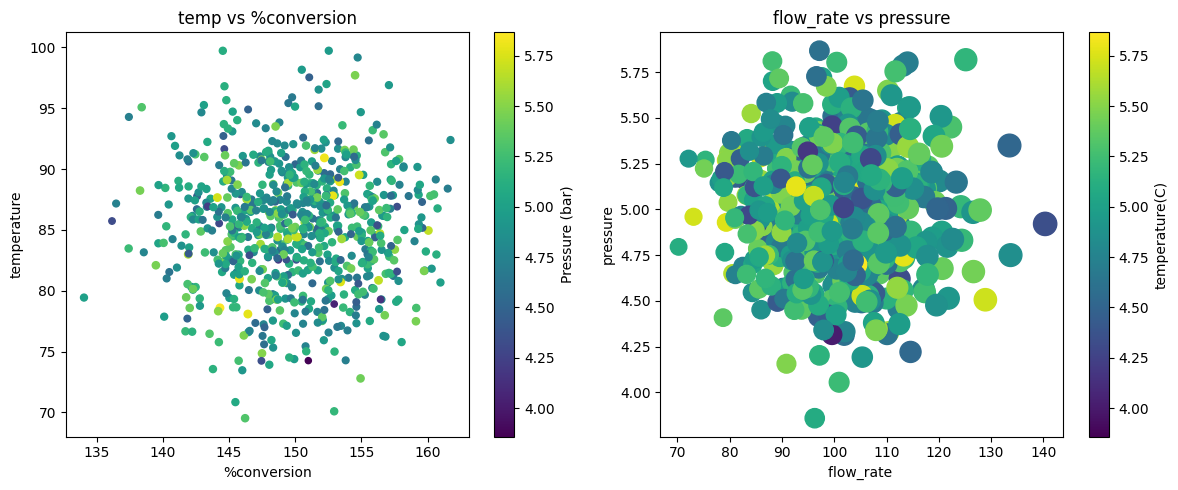

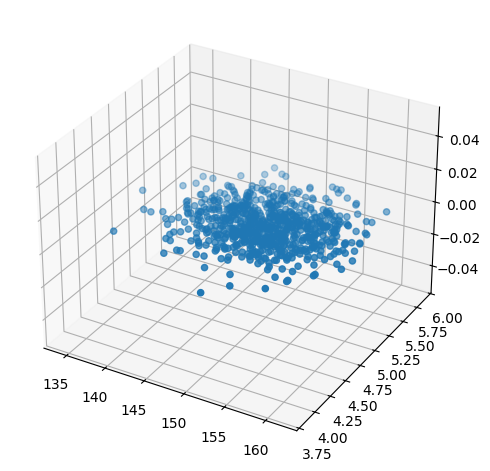

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(20)

time = pd.date_range(start='2024-01-01',periods = 30*24,freq='h')

temperature = np.random.normal(loc=150, scale=5, size=len(time))  # in °C
pressure = np.random.normal(loc=5, scale=0.3, size=len(time))     # in bar
flow_rate = np.random.normal(loc=100, scale=10, size=len(time))   # in L/h
conversion = np.clip(np.random.normal(loc=0.85, scale=0.05, size=len(time)), 0, 1)

df = pd.DataFrame({
    'timestamp':time,
    'temperature(C)':temperature,
    'pressure(bar)':pressure,
    'flow_rate(L/h)':flow_rate,
    'reactor conversion(%)': conversion*100
})

df.to_csv('plant_process.csv', index=False)
print(df.head())

df = pd.read_csv('plant_process.csv',parse_dates=['timestamp'])  #df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# plt.figure(figsize=(16,8))
# plt.plot(df['timestamp'],df['temperature(C)'])
# plt.show()

fig, ax = plt.subplots(2,2,figsize=(12,5))

ax[0,0].plot(df['timestamp'],df['temperature(C)'])
ax[0,0].set_title('timestamp vs temp')
ax[0,0].set_xlabel('timestamp')
ax[0,0].set_ylabel('temperature')


ax[0,1].plot(df['timestamp'],df['pressure(bar)'])
ax[0,1].set_title('timestamp vs pressure')
ax[0,1].set_xlabel('timestamp')
ax[0,1].set_ylabel('pressure')

ax[1,0].plot(df['timestamp'],df['flow_rate(L/h)'])
ax[1,0].set_title('timestamp vs flowrate')
ax[1,0].set_xlabel('timestamp')
ax[1,0].set_ylabel('flowrate')

ax[1,1].plot(df['timestamp'],df['reactor conversion(%)'])
ax[1,1].set_title('timestamp vs conversion')
ax[1,1].set_xlabel('timestamp')
ax[1,1].set_ylabel('conversion')

df['Temp_MA_6hr'] = df['temperature(C)'].rolling(window=6).mean()       # point 


# fig.autofmt_xdate()
for a in ax.flat:          
    a.tick_params(axis='x',rotation=45)               # point 
plt.tight_layout()
fig, ax = plt.subplots(2,2,figsize=(12,5))

ax[0,0].scatter(df['temperature(C)'],df['reactor conversion(%)'])
ax[0,0].set_title('temp vs %conversion')
ax[0,0].set_xlabel('%conversion')
ax[0,0].set_ylabel('temperature')


ax[0,1].scatter(df['temperature(C)'],df['pressure(bar)'])
ax[0,1].set_title('temperature vs pressure')
ax[0,1].set_xlabel('temperature')
ax[0,1].set_ylabel('pressure(bar)')

ax[1,0].scatter(df['flow_rate(L/h)'],df['pressure(bar)'])
ax[1,0].set_title('flow_rate vs pressure')
ax[1,0].set_xlabel('flow_rate ')
ax[1,0].set_ylabel('pressure')

ax[1,1].scatter(df['timestamp'],df['reactor conversion(%)'])
ax[1,1].set_title('timestamp vs conversion')
ax[1,1].set_xlabel('timestamp')
ax[1,1].set_ylabel('conversion')

for a in ax.flat:          
    a.tick_params(axis='x',rotation=45)               # point 
plt.tight_layout()


fig, ax = plt.subplots(1,2,figsize=(12,5))

sc = ax[0].scatter(df['temperature(C)'],df['reactor conversion(%)'],c = df['pressure(bar)'],s = df['pressure(bar)']*5)
fig.colorbar(sc, ax=ax[0], label='Pressure (bar)')
ax[0].set_title('temp vs %conversion')
ax[0].set_xlabel('%conversion')
ax[0].set_ylabel('temperature')

hx = ax[1].scatter(df['flow_rate(L/h)'],df['pressure(bar)'],c = df['temperature(C)'],s = df['flow_rate(L/h)']*2)
fig.colorbar(sc, ax=ax[1], label='temperature(C)')
ax[1].set_title('flow_rate vs pressure')
ax[1].set_xlabel('flow_rate ')
ax[1].set_ylabel('pressure')

plt.tight_layout()

plt.show()